In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
# convert job_skills STR type to LIST type
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Top 5 skills for Data Analyst by month

In [3]:
df['job_posted_month'] = df.job_posted_date.dt.to_period('M')

In [72]:
#Extract dataframe based on the job title = 'Data Analyst'
job_title = 'Data Analyst'
df_DA = df[df.job_title_short == job_title]

In [23]:
# Create a new data frame after df.explode()
df_DA_explode = df_DA.explode('job_skills')

In [50]:
# Create pivot table, replace missing values with 0 if any

df_pivot = df_DA_explode.pivot_table(index = 'job_posted_month', columns= 'job_skills', aggfunc= 'size', fill_value=0)

In [51]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2023-02,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
2023-03,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
2023-04,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
2023-05,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
2023-06,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
2023-07,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
2023-08,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
2023-09,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [52]:
# Create a total row to identify top skills

df_pivot.loc['total'] = df_pivot.sum()
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2023-02,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
2023-03,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
2023-04,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
2023-05,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
2023-06,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
2023-07,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
2023-08,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
2023-09,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [55]:
df_pivot.loc['total'].sort_values(ascending= False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [62]:
# Select columns from the data Frame based on the sorted list

df_pivot_final = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]
df_pivot_final 

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2023-02,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
2023-03,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
2023-04,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
2023-05,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
2023-06,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
2023-07,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
2023-08,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
2023-09,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_pivot_final = df_pivot_final.drop('total')
df_pivot_final

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2023-02,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
2023-03,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
2023-04,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
2023-05,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
2023-06,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
2023-07,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
2023-08,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
2023-09,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


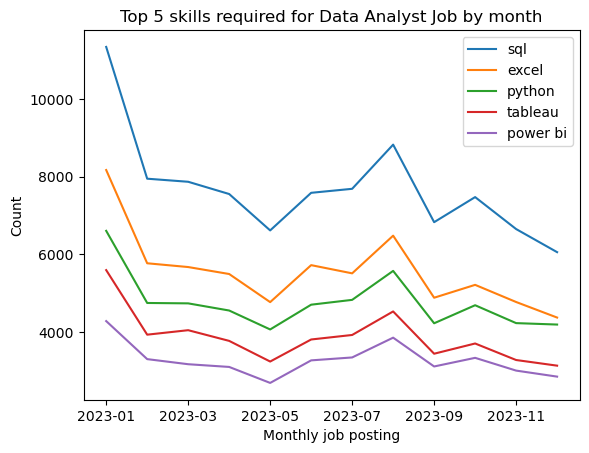

In [71]:
# Based on data Frame above, plot first 5 columns (top 5 skills)

df_pivot_final.iloc[:, 0:5].plot(kind = 'line')
plt.title('Top 5 skills required for Data Analyst Job by month')
plt.xlabel('Monthly job posting')
plt.legend()
plt.ylabel('Count')
plt.show()
